In [1]:
# Importing all the necessary libraries
import pandas as pd;
import numpy as np;
import dill; # To save the current python-session
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the Dataset
df=pd.read_csv("/Users/ruthvikrajam.v/Desktop/Project/Stable Home Insurance - Dataset.csv");

In [3]:
df.dtypes.value_counts()

object     42
float64    23
int64       1
dtype: int64

In [4]:
# Importing Metadata
md1=pd.read_excel("/Users/ruthvikrajam.v/Desktop/Analysis of Big Data/Project/Stable Home Insurance - Metadata.xlsx", "Sheet1");
md2=pd.read_excel("/Users/ruthvikrajam.v/Desktop/Analysis of Big Data/Project/Stable Home Insurance - Metadata.xlsx", "Sheet2");

In [5]:
# List of columns
df.columns

Index(['QUOTE_DATE', 'COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS',
       'P1_PT_EMP_STATUS', 'BUS_USE', 'CLERICAL', 'AD_BUILDINGS',
       'RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B',
       'AD_CONTENTS', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS',
       'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER', 'BUILDINGS_COVER',
       'SPEC_SUM_INSURED', 'SPEC_ITEM_PREM', 'UNSPEC_HRP_PREM', 'P1_DOB',
       'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM',
       'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION',
       'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS',
       'OWNERSHIP_TYPE', 'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED',
       'SEC_DISC_REQ', 'SUBSIDENCE', 'YEARBUILT', 'CAMPAIGN_DESC',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE

In [6]:
#### Analyzing Unique values in each feature ####:-

df["CLAIM3YEARS"].unique()

df["P1_EMP_STATUS"].unique()

df["P1_PT_EMP_STATUS"].unique()

df["BUS_USE"].unique()

df["CLERICAL"].unique()

df["AD_BUILDINGS"].unique()

data1, count1=np.unique(df["RISK_RATED_AREA_B"], return_counts=True)

df["SUM_INSURED_BUILDINGS"].unique()

data2, count2=np.unique(df["NCD_GRANTED_YEARS_B"], return_counts=True)

df["AD_CONTENTS"].unique()

data3, count3=np.unique(df["RISK_RATED_AREA_C"], return_counts=True)

df["SUM_INSURED_CONTENTS"].unique()

data4, count4=np.unique(df["NCD_GRANTED_YEARS_C"], return_counts=True)

df["CONTENTS_COVER"].unique()

df["BUILDINGS_COVER"].unique()

data5, count5=np.unique(df["SPEC_SUM_INSURED"], return_counts=True)

data6, count6=np.unique(df["SPEC_ITEM_PREM"], return_counts=True)

data7, count7=np.unique(df["UNSPEC_HRP_PREM"], return_counts=True)

df["P1_MAR_STATUS"].unique()

df["P1_POLICY_REFUSED"].unique()

df["P1_SEX"].unique()

df["APPR_ALARM"].unique()

df["APPR_LOCKS"].unique()

df["BEDROOMS"].unique()

data8, count8=np.unique(df["ROOF_CONSTRUCTION"], return_counts=True)

data9, count9=np.unique(df["WALL_CONSTRUCTION"], return_counts=True)

df["FLOODING"].unique()

data10, count10=np.unique(df["LISTED"], return_counts=True)

data11, count11=np.unique(df["MAX_DAYS_UNOCC"], return_counts=True)

df["NEIGH_WATCH"].unique()

df["OCC_STATUS"].unique()

data12, count12=np.unique(df["OWNERSHIP_TYPE"], return_counts=True)

data13, count13=np.unique(df["PAYING_GUESTS"], return_counts=True)

data14, count14=np.unique(df["PROP_TYPE"], return_counts=True)

df["SAFE_INSTALLED"].unique()

df["SEC_DISC_REQ"].unique()

df["SUBSIDENCE"].unique()

data15, count15=np.unique(df["YEARBUILT"], return_counts=True)

df["CAMPAIGN_DESC"].unique()

df["PAYMENT_METHOD"].unique()

data16, count16=np.unique(df["PAYMENT_FREQUENCY"], return_counts=True)

df["LEGAL_ADDON_PRE_REN"].unique()

df["LEGAL_ADDON_POST_REN"].unique()

df["HOME_EM_ADDON_PRE_REN"].unique()

df["HOME_EM_ADDON_POST_REN"].unique()

df["GARDEN_ADDON_PRE_REN"].unique()

df["GARDEN_ADDON_POST_REN"].unique()

df["KEYCARE_ADDON_PRE_REN"].unique()

df["KEYCARE_ADDON_POST_REN"].unique()

df["HP1_ADDON_PRE_REN"].unique()

df["HP1_ADDON_POST_REN"].unique()

df["HP2_ADDON_PRE_REN"].unique()

df["HP2_ADDON_POST_REN"].unique()

df["HP3_ADDON_PRE_REN"].unique()

df["HP3_ADDON_POST_REN"].unique()

df["MTA_FLAG"].unique()

data17, count17=np.unique(df["MTA_FAP"], return_counts=True)

data18, count18=np.unique(df["MTA_APRP"], return_counts=True)

data19, count19=np.unique(df["LAST_ANN_PREM_GROSS"], return_counts=True)

df["POL_STATUS"].unique()

array(['Lapsed', 'Live', 'Cancelled', nan, 'Unknown'], dtype=object)

In [7]:
#### Output for the above commands ####:-

#[Excluding nan values] -> Except in Police column, we have nan values in all other columns

# QUOTE_DATE -> MM/DD/YYYY
# COVER_START -> DD/MM/YYYY
# CLAIM3YEARS -> Y, N [Whether the person has claimed for Insurance (or) not in the last three years]
# P1_EMP_STATUS -> R, E, S, N, H, U, A, F, I, V, C
# P1_PT_EMP_STATUS -> R, E, S, H, U, F, I, V, C 
# BUS_USE -> Y, N
# CLERICAL -> Y, N
# AD_BUILDINGS -> Y, N
# RISK_RATED_AREA_B -> 54 distinct values ranging from 0 to 98
# SUM_INSURED_BUILDINGS -> 0, 1000000
# NCD_GRANTED_YEARS_B -> 10 distinct values ranging from 0 to 9
# AD_CONTENTS -> Y, N
# RISK_RATED_AREA_C -> 49 distinct values ranging from 0 to 98
# SUM_INSURED_CONTENTS -> 0, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 100000
# NCD_GRANTED_YEARS_C -> 10 distinct values ranging from 0 to 9
# CONTENTS_COVER -> Y, N
# BUILDINGS_COVER -> Y, N
# SPEC_SUM_INSURED -> 2155 distinct values ranging from 0 to 47500
# SPEC_ITEM_PREM -> 5474 distinct values randing from 0 to 973.53
# UNSPEC_HRP_PREM -> 2993 distinct values ranging from 0 to 162.61
# P1_DOB -> DD/MM/YYYY
# P1_MAR_STATUS -> O, M, S, W, D, P, A, C, B, N
# P1_POLICY_REFUSED -> Y, N
# P1_SEX -> M, F, N
# APPR_ALARM -> Y, N
# APPR_LOCKS -> Y, N
# BEDROOMS -> 1, 2, 3, 4, 5, 6, 7
# ROOF_CONSTRUCTION -> 17 distinct values ranging from 2 to 99
# WALL_CONSTRUCTION -> 19 distinct values ranging from 1 to 99
# FLOODING -> Y, N
# LISTED -> 1, 2, 3, 4, 5
# MAX_DAYS_UNOCC -> 7 distinct values ranging from 0 to 181
# NEIGH_WATCH -> N, Y
# OCC_STATUS -> PH, UN, LP, HH, WD, WE, OT
# OWNERSHIP_TYPE -> 14 unique values ranging from 1 to 18
# PAYING_GUESTS -> 0, 1
# PROP_TYPE -> 36 unique values ranging from 1 to 53
# SAFE_INSTALLED -> Y, N
# SEC_DISC_REQ -> Y, N
# SUBSIDENCE -> Y, N
# YEARBUILT -> 17 unique values ranging from 1749 to 2000
# CAMPAIGN_DESC -> All are nan values 
# PAYMENT_METHOD -> PureDD, NonDD, DD-Other
# PAYMENT_FREQUENCY -> 1
# LEGAL_ADDON_PRE_REN -> Y, N
# LEGAL_ADDON_POST_REN -> Y, N
# HOME_EM_ADDON_PRE_REN -> Y, N
# HOME_EM_ADDON_POST_REN -> Y, N
# GARDEN_ADDON_PRE_REN -> Y, N
# GARDEN_ADDON_POST_REN -> Y, N
# KEYCARE_ADDON_PRE_REN -> Y, N
# KEYCARE_ADDON_POST_REN -> Y, N
# HP1_ADDON_PRE_REN -> Y, N
# HP1_ADDON_POST_REN -> Y, N
# HP2_ADDON_PRE_REN -> Y, N
# HP2_ADDON_POST_REN -> Y, N
# HP3_ADDON_PRE_REN -> Y, N
# HP3_ADDON_POST_REN -> Y, N
# MTA_FLAG -> Y, N
# MTA_FAP -> 25994 unique values ranging from -1152.68 to 4631.86
# MTA_APRP -> 19204 unique values ranging from -423.08 to 1449.24
# MTA_DATE -> DD/MM/YYYY
# LAST_ANN_PREM_GROSS -> 37445 unique values ranging from -1152.68 to 4631.86
# POL_STATUS -> Lapsed, Live, Cancelled, Unknown
# Police -> Unique code that starts from "P000001" to "P256136" [size of the dataset]

In [8]:
df1=df.copy();

# Data Cleaning:-

In [9]:
#### DROPPING THE COLUMNS ####:-

# Dropping the column i -> Index from 1 to 256136
df1=df1.drop(columns=["i"]);

# Dropping the column CAMPAIGN_DESC -> All are Nan values
df1=df1.drop(columns=["CAMPAIGN_DESC"]); 

# Dropping the column P1_PT_EMP_STATUS -> 99.3% of the values are Nan values
df1=df1.drop(columns=["P1_PT_EMP_STATUS"]);

# Dropping the column CLERICAL -> 98.86% of the values are Nan values
df1=df1.drop(columns=["CLERICAL"]);

In [10]:
#### Dropping the rows ####:-

df1=df1.dropna(axis=0, how="all"); # Dropping the rows if all the column values are Null values
df1=df1.dropna(axis=0, thresh = 30) # Keep rows with atleast 30 Non-Null values -> 50% of the info
                                    # thresh -> require that many non-NA values


In [11]:
#### Additional Analysis to drop rows and columns ####:-

df1.notnull().all().sum() # Getting the count of columns with no Null values 

55

In [12]:
# Therefore from above it is clear that there are 7 columns with Null values
 # QUOTE_DATE -> 79144 non-null
 # RISK_RATED_AREA_B -> 140876 non-null
 # RISK_RATED_AREA_C -> 180290 non-null 
 # PAYMENT_FREQUENCY -> 80554 non-null
 # MTA_FAP -> 55380 non-null
 # MTA_APRP -> 55380 non-null
 # MTA_DATE -> 26430 non-null,,,,,,,,,,,,,,,,,,,, out of 189021 values

 # Thereby, more than 70% of the values are Null values for the columns MTA_FAP, MTA_APRP, MTA_DATE so, dropping the three columns
 # Also, more than 57% of the values are Null values for the column PAYMENT_FREQUENCY and there is only one unique value for the entire 
  # column i.e 1 apart from Null value. So, dropping this column doesn't make much difference
  
df1=df1.drop(columns=["PAYMENT_FREQUENCY", "MTA_FAP", "MTA_APRP", "MTA_DATE"]);


In [13]:
# Dealing with rest of the columns:- QUOTE_DATE, RISK_RATED_AREA_B, RISK_RATED_AREA_C
 # 58% of the data are Null values in the column QUOTE_DATE so,dropping the column QUOTE_DATE

df1=df1.drop(columns=["QUOTE_DATE"]);

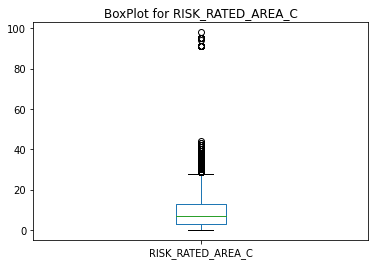

In [14]:
# Box Plot for the columns RISK_RATED_AREA_C (&) RISK_RATED_AREA_B
df1["RISK_RATED_AREA_C"].plot(kind="box")
plt.title("BoxPlot for RISK_RATED_AREA_C");


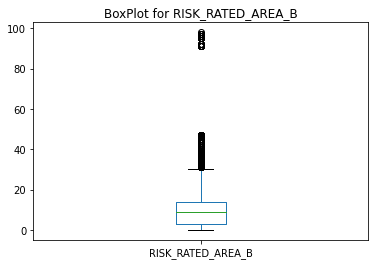

In [15]:
df1["RISK_RATED_AREA_B"].plot(kind="box")
plt.title("BoxPlot for RISK_RATED_AREA_B");


In [16]:
# RISK_RATED_AREA_C -> Applying Mean concept to fill the Null values

 # From above it is clear that the columns have outliers 
Q3, Q1=np.nanpercentile(df1["RISK_RATED_AREA_C"], [75, 25]);
IQR=Q3-Q1;
UL=Q3+1.5*IQR; # Upper Limit
LL=Q1-1.5*IQR; # Lower Limit
print(UL);
print(LL);

28.0
-12.0


<AxesSubplot:>

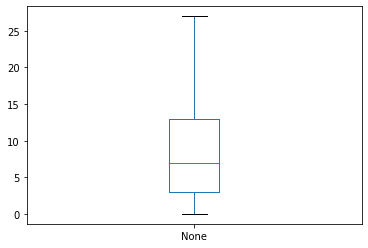

In [17]:
no_outliers_RISK_RATED_AREA_C=[x for x in df1["RISK_RATED_AREA_C"] if x>LL and x<UL]
no_outliers_RISK_RATED_AREA_C=pd.Series(no_outliers_RISK_RATED_AREA_C)
no_outliers_RISK_RATED_AREA_C.plot(kind="box")

In [18]:
df1['RISK_RATED_AREA_C'].fillna((no_outliers_RISK_RATED_AREA_C.mean()), inplace=True)

In [19]:
# RISK_RATED_AREA_B -> Applying KNN algorithm to fill the Null values

df1=df1.reset_index()
del df1['index']

In [20]:
df2=df1.copy()
df2=df2.drop(columns=["COVER_START", "P1_DOB", "Police"])

In [21]:
df3=pd.get_dummies(df2, drop_first=True)

In [22]:
# Scaling the values
scaler = MinMaxScaler()
df4 = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)

In [23]:
# Implementing KNN Imputer on the feature RISK_RATED_AREA_B
imputer = KNNImputer(n_neighbors=3)
df_imputer = pd.DataFrame(imputer.fit_transform(df4),columns = df4.columns)

In [24]:
# Inversing the scaled values
df_imputer_inverse=scaler.inverse_transform(df_imputer)
df_imputer_inverse=pd.DataFrame(df_imputer_inverse)

In [25]:
# Final Dataset
df_final=df1.copy()
RISK_RATED_AREA_B_New=df_imputer_inverse[0]
df_final["RISK_RATED_AREA_B"] = RISK_RATED_AREA_B_New

In [26]:
df_final.info() # No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189021 entries, 0 to 189020
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COVER_START             189021 non-null  object 
 1   CLAIM3YEARS             189021 non-null  object 
 2   P1_EMP_STATUS           189021 non-null  object 
 3   BUS_USE                 189021 non-null  object 
 4   AD_BUILDINGS            189021 non-null  object 
 5   RISK_RATED_AREA_B       189021 non-null  float64
 6   SUM_INSURED_BUILDINGS   189021 non-null  float64
 7   NCD_GRANTED_YEARS_B     189021 non-null  float64
 8   AD_CONTENTS             189021 non-null  object 
 9   RISK_RATED_AREA_C       189021 non-null  float64
 10  SUM_INSURED_CONTENTS    189021 non-null  float64
 11  NCD_GRANTED_YEARS_C     189021 non-null  float64
 12  CONTENTS_COVER          189021 non-null  object 
 13  BUILDINGS_COVER         189021 non-null  object 
 14  SPEC_SUM_INSURED    

In [ ]:
# Exporting the final dataset to local disk
df_final.to_csv("/Users/ruthvikrajam.v/Desktop/Final Dataset.csv");